In [1]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, KFold 
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout, Dense
from keras.models import Sequential 
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
import plotly.graph_objs as go 
import plotly.offline as pyo
import seaborn as sns 
import pandas as pd 
import numpy as np 
import keras
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load dataset 
data = pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
# first two columns present in 
# dataset in encoded form 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# no null values present 
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
# not including first 2 columns of original dataset
# first five features are continous 
# and remaining features are in encoded form 
X = data.iloc[:,2:-1]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# features with continuous data
X.iloc[:,:9].head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
# target 'size' data 
Y = data[['size_category']]
print(Y.value_counts())
Y.head()

size_category
small            378
large            139
dtype: int64


,size_category
0,small
1,small
2,small
3,small
4,small


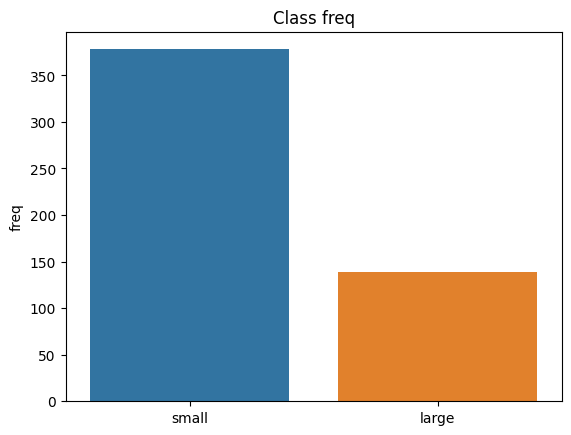

In [8]:
# target contains 2 unique classes
# there is imbalance in target data don't rely on accuracy
n = Y.value_counts()
sns.barplot(x=[i[0] for i in n.index],y=n.values)
plt.title('Class freq')
plt.ylabel('freq')
plt.show()

In [9]:
# LabelEncoding transform on target 
enc = LabelEncoder()
newY = enc.fit_transform(Y)
pd.DataFrame(newY.ravel(),columns=['Enc. target class']).head()

,Enc. target class
0,1
1,1
2,1
3,1
4,1


In [10]:
# stardization of continuous feature data 
scale = StandardScaler()
X.iloc[:,:9] = scale.fit_transform(X.iloc[:,:9])

In [11]:
X.shape

(517, 28)

In [12]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,0,1,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,0,1,0,0,0,0


#### 28 features (including engineered features) implies input layer of NN will have 28 neurons

In [13]:
def baseModel(lr,dr,n1):
    model = Sequential()
    # 1st hidden layer -> n1 neurons
    model.add(Dense(n1,input_dim=28,
                    kernel_initializer='uniform',
                    activation='relu'))
    # 1st dropout layer for regularization
    model.add(Dropout(dr))
    # 2nd hidden layer -> 14 neurons 
    model.add(Dense(14,kernel_initializer='uniform',
                    activation='relu'))
    # 2nd dropout layer 
    model.add(Dropout(dr))
    # output layer -> ouput ranges from 0 to 1
    model.add(Dense(1,kernel_initializer='uniform',
                    activation='sigmoid'))
    adam = Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam,metrics=['accuracy'])
    return model 

In [14]:
# classifier model 
model = KerasClassifier(build_fn=baseModel, verbose=0,epochs=20)
lr = [0.001,0.01,0.1] # learning rate
dr = [0.0,0.1]        # dropout rate
n1 = [12,20,50]       # no. of neurons in first hidden layer
param_grid = dict(lr=lr,
                  n1=n1,
                  dr=dr)
param_grid

{'lr': [0.001, 0.01, 0.1], 'n1': [12, 20, 50], 'dr': [0.0, 0.1]}

In [15]:
# get parameters giving best score 
grid = GridSearchCV(estimator=model,param_grid=param_grid,
                    cv=KFold(),verbose=10)
grid_result = grid.fit(X,newY)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START dr=0.0, lr=0.001, n1=12....................................
[CV 1/5; 1/18] END .....dr=0.0, lr=0.001, n1=12;, score=1.000 total time=   1.4s
[CV 2/5; 1/18] START dr=0.0, lr=0.001, n1=12....................................
[CV 2/5; 1/18] END .....dr=0.0, lr=0.001, n1=12;, score=0.750 total time=   1.5s
[CV 3/5; 1/18] START dr=0.0, lr=0.001, n1=12....................................
[CV 3/5; 1/18] END .....dr=0.0, lr=0.001, n1=12;, score=0.524 total time=   1.4s
[CV 4/5; 1/18] START dr=0.0, lr=0.001, n1=12....................................
[CV 4/5; 1/18] END .....dr=0.0, lr=0.001, n1=12;, score=0.680 total time=   1.2s
[CV 5/5; 1/18] START dr=0.0, lr=0.001, n1=12....................................
[CV 5/5; 1/18] END .....dr=0.0, lr=0.001, n1=12;, score=0.757 total time=   1.0s
[CV 1/5; 2/18] START dr=0.0, lr=0.001, n1=20....................................
[CV 1/5; 2/18] END .....dr=0.0, lr=0.001, n1=20;

[CV 1/5; 11/18] END ....dr=0.1, lr=0.001, n1=20;, score=1.000 total time=   0.9s
[CV 2/5; 11/18] START dr=0.1, lr=0.001, n1=20...................................
[CV 2/5; 11/18] END ....dr=0.1, lr=0.001, n1=20;, score=0.750 total time=   0.9s
[CV 3/5; 11/18] START dr=0.1, lr=0.001, n1=20...................................
[CV 3/5; 11/18] END ....dr=0.1, lr=0.001, n1=20;, score=0.524 total time=   1.6s
[CV 4/5; 11/18] START dr=0.1, lr=0.001, n1=20...................................
[CV 4/5; 11/18] END ....dr=0.1, lr=0.001, n1=20;, score=0.709 total time=   1.0s
[CV 5/5; 11/18] START dr=0.1, lr=0.001, n1=20...................................
[CV 5/5; 11/18] END ....dr=0.1, lr=0.001, n1=20;, score=0.748 total time=   1.3s
[CV 1/5; 12/18] START dr=0.1, lr=0.001, n1=50...................................
[CV 1/5; 12/18] END ....dr=0.1, lr=0.001, n1=50;, score=1.000 total time=   0.9s
[CV 2/5; 12/18] START dr=0.1, lr=0.001, n1=50...................................
[CV 2/5; 12/18] END ....dr=0

In [16]:
print(f'Model gives Best Score : {grid_result.best_score_}\nWith params :\nLearning rate : {grid_result.best_params_["lr"]}\nDropout rate : {grid_result.best_params_["dr"]}\n1st Hidden layer containing : {grid_result.best_params_["n1"]} neurons')

Model gives Best Score : 0.9496452569961548
With params :
Learning rate : 0.01
Dropout rate : 0.1
1st Hidden layer containing : 50 neurons


In [17]:
# N.N with best parameters 
clf = baseModel(grid_result.best_params_["lr"],
                   grid_result.best_params_["dr"],
                   grid_result.best_params_["n1"])

In [18]:
history = clf.fit(X,newY,epochs=60,validation_split=0.2,batch_size=10)

Epoch 1/60
42/42 [==============================] - 1s 6ms/step - loss: 0.5772 - accuracy: 0.7361 - val_loss: 0.5646 - val_accuracy: 0.7019
Epoch 2/60
42/42 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 0.7990 - val_loss: 0.4985 - val_accuracy: 0.8173
Epoch 3/60
42/42 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.8814 - val_loss: 0.5187 - val_accuracy: 0.9038
Epoch 4/60
42/42 [==============================] - 0s 5ms/step - loss: 0.2010 - accuracy: 0.9225 - val_loss: 0.6992 - val_accuracy: 0.8462
Epoch 5/60
42/42 [==============================] - 0s 6ms/step - loss: 0.1771 - accuracy: 0.9419 - val_loss: 0.6907 - val_accuracy: 0.9038
Epoch 6/60
42/42 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.9516 - val_loss: 0.7537 - val_accuracy: 0.9327
Epoch 7/60
42/42 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9637 - val_loss: 0.9854 - val_accuracy: 0.9231
Epoch 8/60
42/42 [==

In [19]:
# accuracy score of new model with best params 
score = clf.evaluate(X,newY)

17/17 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.9768


In [20]:
print('%s : %.2f%%'  % (clf.metrics_names[1],score[1]*100))

accuracy : 97.68%


In [21]:
# predict target 'size_category'
pred = clf.predict(X).ravel()
y_pred = np.round(pred).ravel()

17/17 [==============================] - 0s 1ms/step


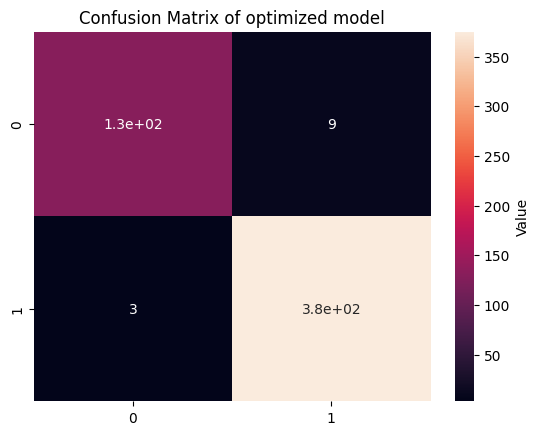

In [22]:
# confusion-martix of optimized model 
sns.heatmap(confusion_matrix(newY,y_pred),
            annot=True,cbar_kws={'label':'Value'})
plt.title('Confusion Matrix of optimized model')
plt.show()

In [23]:
print(classification_report(newY,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       139
           1       0.98      0.99      0.98       378

    accuracy                           0.98       517
   macro avg       0.98      0.96      0.97       517
weighted avg       0.98      0.98      0.98       517



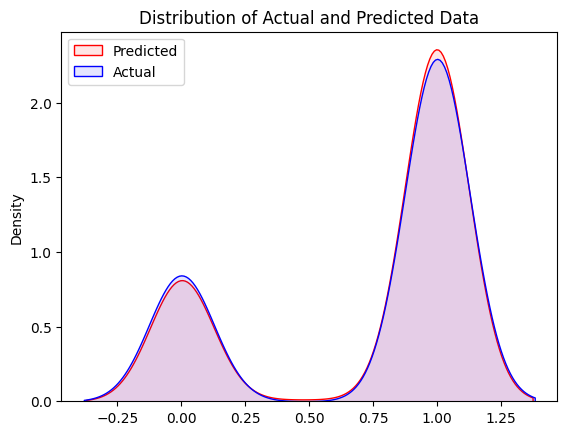

In [24]:
p = sns.distplot(pred,hist=False,color='red',
                kde_kws={'shade':True,'alpha':0.1})
a = sns.distplot(newY,hist=False,color='blue',
                 kde_kws={'shade':True,'alpha':0.1})
plt.legend(['Predicted','Actual'],loc='upper left')
plt.title('Distribution of Actual and Predicted Data')
plt.show()

In [25]:
# Predict Burned area using Neural Network
data.iloc[:,:10].join(pd.DataFrame(y_pred,
                    columns=['Predicted size']).replace({1:'small',0:'large'}))

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Predicted size
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,small
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,small
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


## Neural Network predicts burned area of forest fires with F1 score of 98 %